## Assignment 1: Getting to grips with PyTorch

In [334]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [335]:
dataset = pd.read_csv("poverty.txt", delimiter="\t")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [336]:
dataset.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [337]:
dataset.describe()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,13.117647,22.282353,72.019608,7.854902,42.243137
std,4.277228,8.043499,18.975563,8.914131,12.318511
min,5.300000,8.100000,39.000000,0.900000,20.000000
25%,10.250000,17.250000,58.300000,3.900000,33.900000
50%,12.200000,20.000000,69.400000,6.300000,39.500000
75%,15.800000,28.100000,87.950000,9.450000,52.600000
max,25.300000,44.800000,104.300000,65.000000,69.100000


<AxesSubplot:ylabel='Density'>

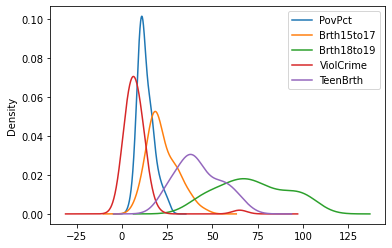

In [338]:
dataset.plot.density()

### seem fairly normal, as a first approximation an OLS seems reasonable (doesn't matter if they are not normal tbh). I don't know whether these are independent. I can check...

In [339]:
dataset.corr()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
PovPct,1.000000,0.730293,0.649660,0.469564,0.703285
Brth15to17,0.730293,1.000000,0.942449,0.640274,0.978826
Brth18to19,0.649660,0.942449,1.000000,0.477704,0.988975
ViolCrime,0.469564,0.640274,0.477704,1.000000,0.557937
TeenBrth,0.703285,0.978826,0.988975,0.557937,1.000000


In [340]:
import seaborn as sns

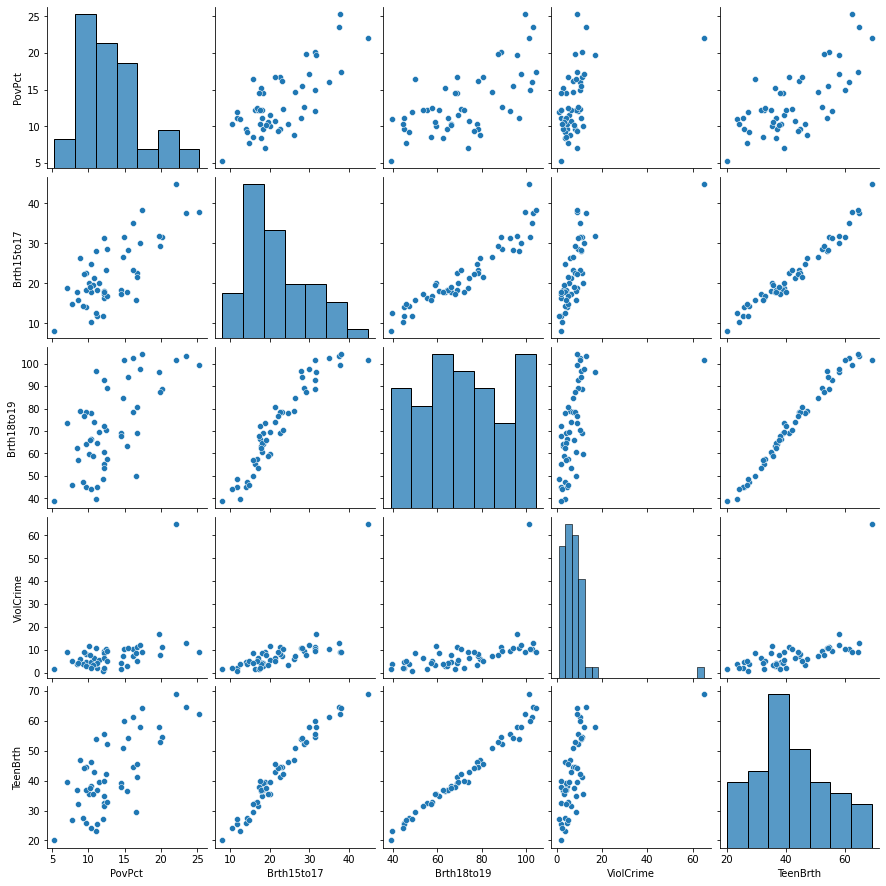

In [341]:
sns.pairplot(dataset)

Some of these are quite correlated e.g. births grouped, teen birth with Vol crime. Don't think OLS is right. Need to pca (de-correlate) then regress or treat each case seperately but Imma roll with it as the main purpose of this exercise is to familiarize myself with pytorch jargon.

edit: turns out this is a simple exercise to regress vec y against specific vec x s.

In [342]:
A = dataset.iloc[:,1:].to_numpy()

### standardize data otherwise routines are going to spit out gibberish

In [347]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
A = scaler.fit_transform(A)

In [348]:
tA = t.from_numpy(A)

In [349]:
tA.requires_grad = True  # set the gradient requirement to put tA on the graph

In [350]:
tA

tensor([[ 1.6487e+00,  1.1574e+00,  8.8779e-01,  3.7899e-01,  1.0049e+00],
        [-1.4209e+00, -4.2469e-01,  8.9437e-02,  1.4107e-01, -2.2490e-01],
        [ 7.0420e-01,  1.5968e+00,  1.6223e+00,  2.8835e-01,  1.5542e+00],
        [ 4.2085e-01,  1.1699e+00,  1.5797e+00,  2.8835e-01,  1.4476e+00],
        [ 8.4587e-01,  3.9884e-02, -1.5539e-01,  3.7899e-01, -9.3722e-02],
        [-1.0195e+00,  4.9190e-01,  3.7684e-01, -2.3282e-01,  3.9000e-01],
        [-8.0698e-01, -1.0274e+00, -1.4328e+00, -3.6877e-01, -1.3481e+00],
        [-6.6531e-01,  3.0356e-01,  3.0765e-01, -4.9340e-01,  3.3261e-01],
        [ 2.0973e+00,  2.8273e+00,  1.5691e+00,  6.4744e+00,  2.2019e+00],
        [ 7.2781e-01,  1.1522e-01,  3.3959e-01, -6.2869e-02,  1.8503e-01],
        [-2.4029e-01,  1.1448e+00,  1.1060e+00,  1.8639e-01,  1.1033e+00],
        [-6.6531e-01, -5.7537e-01, -2.9910e-01, -3.5744e-01, -3.3148e-01],
        [ 3.2640e-01, -4.8747e-01, -1.5539e-01, -4.2542e-01, -2.5769e-01],
        [-1.6945e-01,  1.

In [351]:
tA.mean(dim=0) # simple check to see grad_fn

tensor([2.6123e-17, 4.1361e-17, 0.0000e+00, 8.7076e-18, 2.1769e-18],
       dtype=torch.float64, grad_fn=<MeanBackward1>)

In [352]:
t.matmul(tA[:,1].T, tA[:,2])*2 # another one

tensor(96.1298, dtype=torch.float64, grad_fn=<MulBackward0>)

In [353]:
out = tA.mean()

out.backward()

tA.grad

tensor([[0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039],


OLS defined for a matrix of independent variates $A$ and the target vector $b$, is the vector $x^*$ that argminimizes,
$$ x^* = \text{arg}\min_x{||\hat{A}\bf{x} - \bf{b}||^2} $$

A couple steps of calculus later, (minimizing w.r.t. x), we get:
$$x^* = (\hat{A}^T\hat{A})^{-1}\hat{A}^Tb$$

OLS assumes independent variates but crucially does not assume a form of the distribution of the independent variates. The only assumption is that there is no correlation of the independent variates w.r.t. the assumed noise in our model (a linear factor taken, I suspect, mostly out of convenience as this is the simplest model statisticians like to work with [analogous to the SHO for physicists]).

couple of things that I need to do:

* Clean up ols code to make it work for higher dimensions
* Use pytorch computation graph framework for regression 
 



In [354]:
def ols_plot(vecA, vecB, title_x="x", title_y="y"):
    """
    n-D OLS estimate is produced. Assumes its given n vectors for independent variate and target."
    requires_grad needs to be true to put the entire compute on a DAG.
    
    default is 1-D regression
    aiming to do two calls to the same computation graph (DAG) 
    """
    if len(vecA) != 51:
        vecA = t.vstack((vecA)) # this A.T
        
    else:
        vecA = vecA.reshape(-1,len(vecA))
        
        
        
    vecB = vecB.reshape(len(vecB), -1)
    
    ii = t.inverse(t.matmul(vecA, vecA.T)) # design matrix inverse
    ols = t.matmul(ii,t.matmul(vecA, vecB))
    
    mx = t.matmul(vecA.mean(dim=1).reshape(1, -1), ols)
    intercept = vecB.mean() - mx   # y - m*x = c  # just use means => ols property, passes through mean

    return ols, intercept

### Plotting Brth15to17 against PovPct using torch

tensor([[0.7303]], dtype=torch.float64) tensor([[2.2284e-17]], dtype=torch.float64)


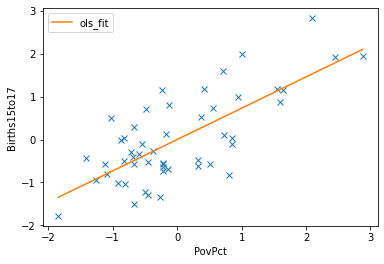

In [355]:
title_x = "PovPct"
title_y = "Births15to17"
with t.no_grad():
    output1 = ols_plot((tA[:,0]), tA[:,1])
    grad1, int1 = output1
    print(grad1, int1)
    ols, intercept = float(grad1), float(int1)
    x = np.linspace(min(tA[:,0]), max(tA[:,0]))
    y = ols*x + intercept
    plt.plot(tA[:,0], tA[:,1], "x")
    plt.plot(x, y, label="ols_fit")
    plt.legend()
    plt.xlabel(title_x)
    plt.ylabel(title_y)
    output2 = ols_plot((tA[:,0], tA[:,3]), tA[:,1])

### Plotting Brth15to17 against PovPct and VoilCrime using torch (using the same computation graph as tensor.backward hasn't been called)

tensor([[0.5512],
        [0.3815]], dtype=torch.float64) tensor([[2.3641e-17]], dtype=torch.float64)


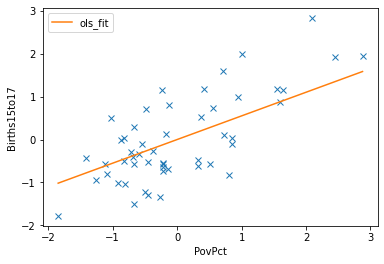

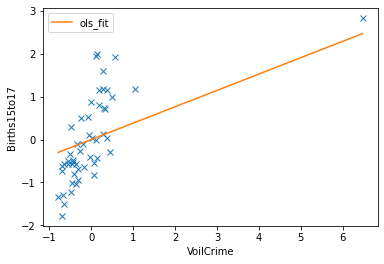

In [356]:
title_x = ["PovPct", "VoilCrime"]
title_y = "Births15to17"
vecA = (tA[:,0], tA[:,3])
vecB = tA[:,1]
with t.no_grad():
    output2 = ols_plot(vecA, vecB)
    ols, intercept = output2
    print(ols, intercept)
    for i,tensor in enumerate(vecA):
        x = t.linspace(float(min(tensor)), float(max(tensor)))
        y = ols[i]*x + intercept

        plt.figure()
        plt.plot(tensor, vecB, "x")
        plt.plot(x, y.squeeze(), label="ols_fit")
        plt.legend()
        plt.xlabel(title_x[i])
        plt.ylabel(title_y)
        

double regression fit not quite successful, outlier skews results maybe? can check... 

But mainly the point of this exercise is that one needs to be careful when working with pytorch tensors. Dynamic graph computation optimizes a tediously long grad evaluation process but simple tensor manipulation through numpy to torch and back transformations can mess with it.

In [306]:
output2 = ols_plot(vecA, vecB)
output2

(tensor([[1.4778],
         [0.2996]], dtype=torch.float64, grad_fn=<MmBackward>),
 tensor([[0.5437]], dtype=torch.float64, grad_fn=<SubBackward0>))

In [290]:
int1.backward(retain_graph=True)

In [291]:
int1

tensor([[0.4028]], dtype=torch.float64, grad_fn=<SubBackward0>)

## Past attempts: deprecated now...

### Plotting Brth15to17 against PovPct using torch

In [270]:
ols, intercept = ols_estimate(tA[:, 0], tA[:, 1])
ols, intercept = float(ols), float(intercept)
ols, intercept

(1.6679469662884245, 0.40281332456949315)

### As a routine

(0.5660044487151114, 0.5057361662773996)

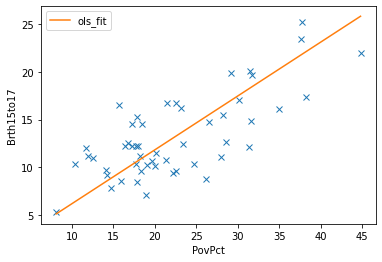

In [85]:
ols_plot(tA[:, 1], tA[:, 0], "PovPct", "Brth15to17")

## Check with sklearn

In [87]:
import sklearn

In [91]:
from sklearn.linear_model import LinearRegression

In [357]:
model = LinearRegression(fit_intercept=True)

x = np.vstack((A[:,0], A[:,3])).T
y = A[:, 1]
model = model.fit(x, y)
model.coef_

array([0.55117127, 0.38146445])

In [358]:
model.intercept_

5.866752095001724e-17

In [327]:
np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y.reshape(51, 1))

array([[1.47780427],
       [0.29959942]])

In [325]:
y.shape

(51,)

In [343]:
A = dataset.iloc[:,1:].to_numpy()

In [329]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # N.B. not scalar lol
print(scaler.fit(A))

StandardScaler()


In [345]:
A = scaler.fit_transform(A)
x = np.vstack((A[:,0], A[:,3])).T
y = A[:, 1]
np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y.reshape(51, 1))

array([[0.55117127],
       [0.38146445]])